# Deep Learning - HW1 - Problem 3


<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
    <span style="color: red;">محمد آرمین دهقان  ---       ۴۰۰۱۰۱۱۷۵</span>

    

In [230]:
### Importing Essentials :

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

In [231]:
## Reading the CSV file : 
df = pd.read_csv('/Users/armin/Downloads/HW1-3/Heart_Disease_Dataset.csv') 
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


# Pre-Processing

In [232]:
### Finding the shape : 
shape = df.shape
print("Shape of dataset is:", shape)

Shape of dataset is: (1190, 12)


In [233]:
### Checking the missing values : 
missings = df.isna().sum()
Sum = missings.sum()

if Sum==0 :
    print('No Missing Value')
else:
    print ('Some Missings Values')

No Missing Value


In [234]:
### Checking whether the 2 classes are ballanced or not : 
patient = df.target.value_counts().loc[1]
well = df.target.value_counts().loc[0]
if (abs(patient - well) >=100):
    print("Not Ballanced")
else :
    print("Ballanced")

Ballanced


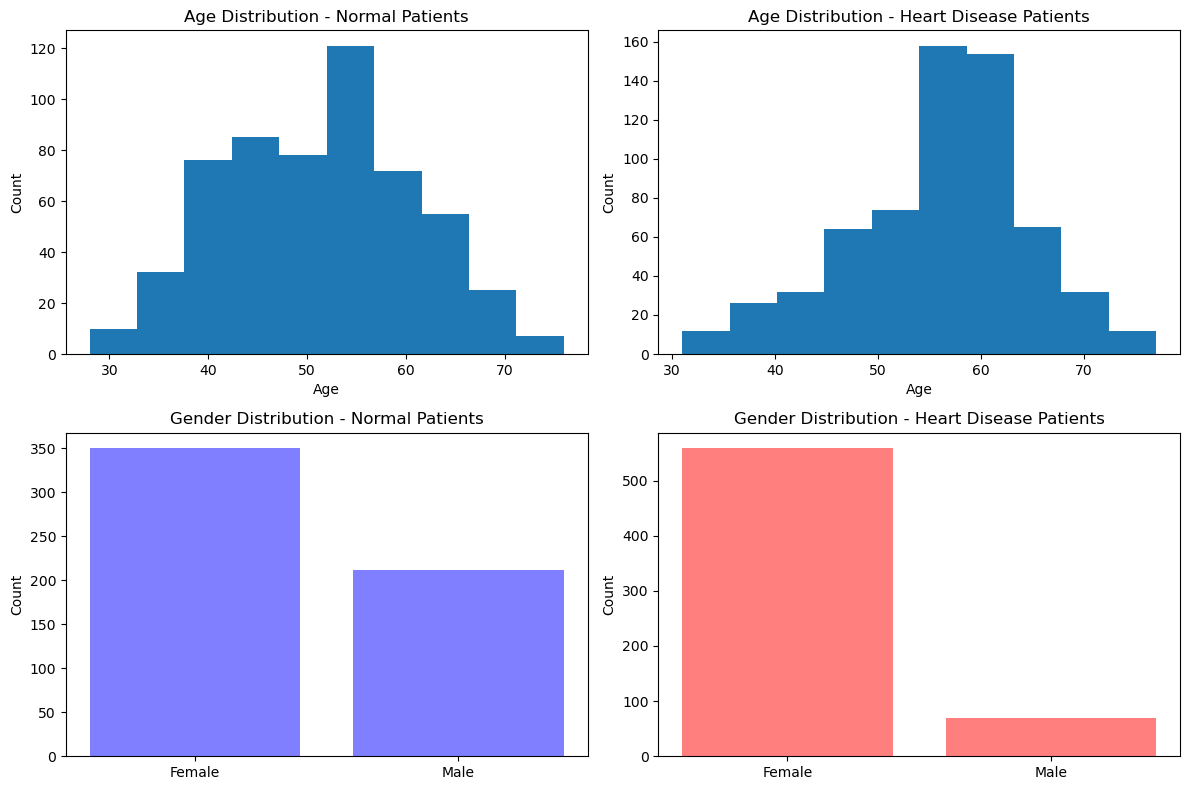

In [235]:
### Plotting : 
#### Plots 

normal_patients = df[df['target'] == 0]
heart_disease_patients = df[df['target'] == 1]


fig, axes = plt.subplots(2, 2, figsize=(12, 8))


axes[0, 0].hist(normal_patients['age'])
axes[0, 0].set_title('Age Distribution - Normal Patients')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')


axes[0, 1].hist(heart_disease_patients['age'])
axes[0, 1].set_title('Age Distribution - Heart Disease Patients')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Count')


gender_labels = ['Female', 'Male']
normal_gender_counts = normal_patients['sex'].value_counts()
axes[1, 0].bar(gender_labels, normal_gender_counts, color='blue', alpha=0.5)
axes[1, 0].set_title('Gender Distribution - Normal Patients')
axes[1, 0].set_ylabel('Count')


heart_disease_gender_counts = heart_disease_patients['sex'].value_counts()
axes[1, 1].bar(gender_labels, heart_disease_gender_counts, color='red', alpha=0.5)
axes[1, 1].set_title('Gender Distribution - Heart Disease Patients')
axes[1, 1].set_ylabel('Count')


plt.tight_layout()
plt.show()

In [236]:
### Using Z-Test to remove outliers : 

threshold = 3
selected_columns = ["age", "resting bp s", "cholesterol", "max heart rate" , "oldpeak"]
selected_df = df[selected_columns]

from scipy import stats

z_scores = np.abs(stats.zscore(selected_df))
outlier_mask = (z_scores>3).any(axis=1)

df_outlier = df[outlier_mask]
df = df[~outlier_mask]
df


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [237]:
## Outlier Rows :
df_outlier

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
30,53,1,3,145,518,0,0,130,0,0.0,2,1
76,32,1,4,118,529,0,0,130,0,0.0,2,1
109,39,1,2,190,241,0,0,106,0,0.0,1,0
149,54,1,4,130,603,1,0,125,1,1.0,2,1
167,50,1,4,140,231,0,1,140,1,5.0,2,1
242,54,1,4,200,198,0,0,142,1,2.0,2,1
325,46,1,4,100,0,1,1,133,0,-2.6,2,1
366,64,0,4,200,0,0,0,140,1,1.0,2,1
371,60,1,4,135,0,0,0,63,1,0.5,1,1
391,51,1,4,140,0,0,0,60,0,0.0,2,1


In [238]:
## Reporting the shape after performing the Z-Test : 
df.shape

(1162, 12)

In [239]:
from sklearn.preprocessing import MinMaxScaler
## Normalizing numerical features to be between 0 and 1 
numeric_columns = ['age' , 'resting bp s' , 'cholesterol' , 'max heart rate' , 'oldpeak' ]

scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df

/var/folders/pb/xcrcc8xd6cb1f5z_scjm3yq80000gn/T/ipykernel_1168/1361352359.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0.244898,1,2,0.571429,0.588595,0,0,0.777778,0,0.333333,1,0
1,0.428571,0,3,0.761905,0.366599,0,0,0.659259,0,0.500000,2,1
2,0.183673,1,2,0.476190,0.576375,0,1,0.229630,0,0.333333,1,0
3,0.408163,0,4,0.552381,0.435845,0,0,0.303704,1,0.583333,2,1
4,0.530612,1,3,0.666667,0.397149,0,0,0.407407,0,0.333333,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,0.346939,1,1,0.285714,0.537678,0,0,0.481481,0,0.533333,2,1
1186,0.816327,1,4,0.609524,0.393075,1,0,0.548148,0,0.900000,2,1
1187,0.591837,1,4,0.476190,0.266802,0,0,0.355556,1,0.533333,2,1
1188,0.591837,0,2,0.476190,0.480652,0,2,0.792593,0,0.333333,2,1


# SVM (Support Vector Machine)

In [240]:

df = df.to_numpy()

# Splitting 70% for train and 30% for test :
train = df[:int(len(df) * 0.7)]
test = df[int(len(df) * 0.7):]

X_train = train[: , :-1]
y_train = train[: , -1]

X_test = test[: , :-1]
y_test = test[: , -1]

print("Train: ", X_train.shape ,y_train.shape)
print("Test: " ,X_test.shape ,y_test.shape)


Train:  (813, 11) (813,)
Test:  (349, 11) (349,)


In [241]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

def classification_report(y_true, y_pred):
    
    cm = confusion_matrix(y_true, y_pred)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    
    Accuracy = (TP + TN) / float(TP + TN + FP + FN)
    Precision = TP / float(TP + FP)
    Recall = TP / float(TP + FN)
    F1score = 2 * (Precision * Recall) / (Precision + Recall)
    
    print('Accuracy = ',Accuracy*100,'%')
    print('Precision = ',Precision*100,'%')
    print('Recall = ',Recall*100,'%')
    print('F1score = ',F1score*100,'%')
    
    #return Accuracy, Precision, Recall, F1score

In [242]:
# linear kernel (with default C hyperparameter)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

linear_svc=SVC(kernel='linear', C=1) 
linear_svc.fit(X_train,y_train)
y_pred=linear_svc.predict(X_test)

print("results of sklearn svm linear kernel:")
classification_report(y_test, y_pred)

results of sklearn svm linear kernel:
Accuracy =  78.79656160458453 %
Precision =  77.33333333333333 %
Recall =  74.35897435897436 %
F1score =  75.81699346405229 %


In [243]:
## GridSearch for finding the Best "C" value : 
from sklearn.model_selection import GridSearchCV

C_range = np.arange(0.1, 2, 0.1)
param_grid = dict(C=C_range)
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid , cv=5)
grid_search.fit(X_train, y_train)

best_C = grid_search.best_params_['C']
print(f"Best 'C' value: {best_C}")
print("--------------------------")

# linear kernel (with C = best_C )
linear_svc=SVC(kernel='linear', C=best_C) 
linear_svc.fit(X_train,y_train)
y_pred=linear_svc.predict(X_test)

print("results of sklearn svm linear kernel with the C From GridSearch :")
classification_report(y_test, y_pred)


Best 'C' value: 1.0
--------------------------
results of sklearn svm linear kernel with the C From GridSearch :
Accuracy =  78.79656160458453 %
Precision =  77.33333333333333 %
Recall =  74.35897435897436 %
F1score =  75.81699346405229 %


In [244]:
# Polynomial kernel (with default degree hyperparameter)
poly_svc = SVC(kernel='poly')  
poly_svc.fit(X_train, y_train)
y_pred = poly_svc.predict(X_test)

print("results of sklearn svm polynomial kernel:")
classification_report(y_test, y_pred)

results of sklearn svm polynomial kernel:
Accuracy =  79.08309455587393 %
Precision =  80.74074074074075 %
Recall =  69.87179487179486 %
F1score =  74.91408934707903 %


In [245]:
## GridSearch for finding the Best "degree" value : 
param_grid = {'degree': [2, 3, 4, 5 , 6 , 7, 8 , 9 , 10]}  
poly_svc = SVC(kernel='poly')
grid_search = GridSearchCV(poly_svc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_degree = grid_search.best_params_['degree']
print(f"Best 'degree' value: {best_degree}")
print("--------------------------")

# Polynomial kernel (with degree = best_degree )
poly_svc = SVC(kernel='poly' , degree=best_degree , C = 6)  
poly_svc.fit(X_train, y_train)
y_pred = poly_svc.predict(X_test)

print("results of sklearn svm Polynomial kernel with the degree From GridSearch :")
classification_report(y_test, y_pred)

Best 'degree' value: 6
--------------------------
results of sklearn svm Polynomial kernel with the degree From GridSearch :
Accuracy =  84.5272206303725 %
Precision =  84.45945945945947 %
Recall =  80.12820512820514 %
F1score =  82.23684210526318 %


In [247]:
## RBF kernel (with default "gamma" hyperparameter) : 
rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)
y_pred = rbf_svc.predict(X_test)

print("results of sklearn svm RBF kernel:")
classification_report(y_test, y_pred)

results of sklearn svm RBF kernel:
Accuracy =  77.36389684813754 %
Precision =  73.61963190184049 %
Recall =  76.92307692307693 %
F1score =  75.23510971786833 %


<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
    <span style="color: red;">لطفا در نظر داشته باشید که در این قسمت برای پیدا کردن هایپرپارامتر بهینه از روش گرید سرچ استفاده نکردم زیرا دقت بدست آمده با پارامتر گرید سرچ از ۸۵ درصد کمتر بود .</span>


In [248]:
## Changing the "gamma" to find the accuracy more than 85%
rbf_svc = SVC(kernel='rbf', gamma=5 , C = 6)
rbf_svc.fit(X_train, y_train)
y_pred = rbf_svc.predict(X_test)

print("results of sklearn svm RBF kernel with gamma = 5:")
classification_report(y_test, y_pred)


results of sklearn svm RBF kernel with gamma = 5:
Accuracy =  89.68481375358166 %
Precision =  89.47368421052632 %
Recall =  87.17948717948718 %
F1score =  88.31168831168831 %
